In [112]:
##Q1 1.1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
## this sets some style parameters
sns.set()
df = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv")
tkirby = df.loc[df.rawid == 'kirby906a_ax.img']
tkirby 
tkirby = tkirby.assign(icv = sum(tkirby.volume))
tkirby = tkirby.assign(tbv = sum(tkirby.volume[(tkirby.roi !='CSF')]))
tkirby.head()

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
12540,12541,kirby906a_ax.img,Telencephalon_L,467063,2.0,350.0,165.2599,57.1707,1,1,906,11950461,11806583
12541,12542,kirby906a_ax.img,Telencephalon_R,470488,2.0,337.0,171.8695,59.3001,1,1,906,11950461,11806583
12542,12543,kirby906a_ax.img,Diencephalon_L,8801,60.0,327.0,227.1878,31.2303,1,1,906,11950461,11806583
12543,12544,kirby906a_ax.img,Diencephalon_R,9054,63.0,415.0,231.6770,31.1780,1,1,906,11950461,11806583
12544,12545,kirby906a_ax.img,Mesencephalon,9564,86.0,352.0,269.1003,28.6454,1,1,906,11950461,11806583


In [111]:
##Q1 1.2
dataframe=tkirby[['type', 'level','volume']].groupby(['type','level'], as_index=False).sum()
dataframe.head()

,type,level,volume
0,1,1,1195015
1,1,2,1195021
2,1,3,1195034
3,1,4,1195065
4,1,5,1195124


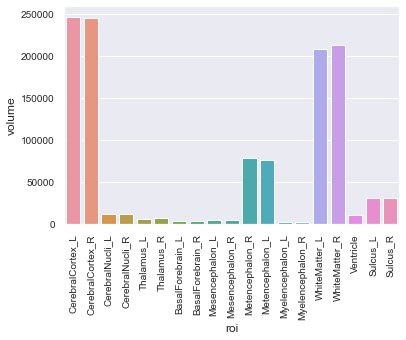

In [49]:
##Q1 1.3
t1l2= tkirby.loc[(tkirby.type == 1) & (tkirby.level == 2)]
t1l3= tkirby.loc[(tkirby.type == 1) & (tkirby.level == 3)]
g = sns.barplot(x='roi', y = 'volume', data = t1l2)
plt.xticks(rotation = 90)
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)


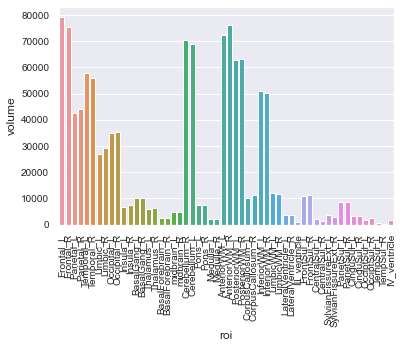

In [50]:
g = sns.barplot(x='roi', y = 'volume', data = t1l3)
plt.xticks(rotation = 90)
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)

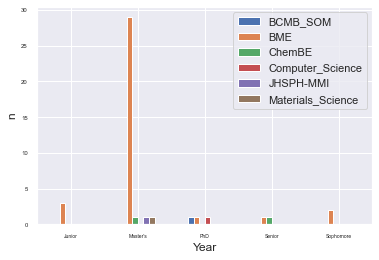

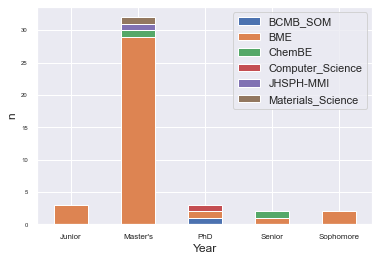

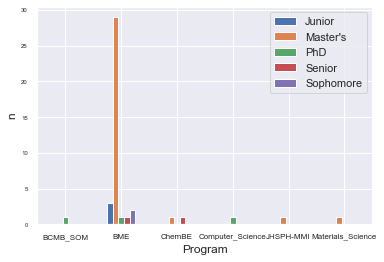

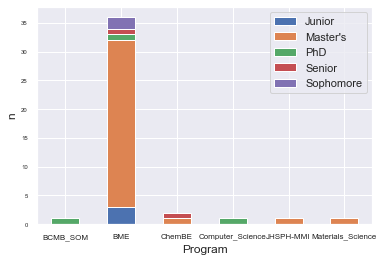

In [133]:
##Q2

import plotly.express as px
df2 = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4ph-bme/master/data/classInterests.txt", sep = "\t")
df2 = df2.assign(n = 1)
df2 = df2[['Year', 'Program', 'n']].groupby(['Year', 'Program'], as_index = False).sum()
for t in range(4):
    if t <= 1:
        df2_pivot = df2.pivot(index='Year', columns='Program', values='n')
        x_label = 'Year'
    else:
        df2_pivot = df2.pivot(index='Program', columns='Year', values='n')
        x_label = 'Program'
    if t in (1,3):
        df2_pivot.plot(kind = 'bar', stacked = True)
    else:
        df2_pivot.plot(kind = 'bar')
    plt.xlabel(x_label)
    plt.ylabel('n')
    plt.legend(loc = 'best')
    plt.xticks(rotation = 0)
    plt.rc('xtick', labelsize = 8)
    plt.show()

In [113]:
##Q3
gene=pd.read_csv("https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/GSE5859_exprs.csv")
gene = gene.drop(['Unnamed: 0'], axis = 1)
mc=gene.sub(gene.mean(axis=1),axis=0)
mr=dm.sub(mc.mean(axis=0),axis=1)
final=mr.div(mc.std(axis=0), axis=1)
final.head()

,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,GSM25399.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
0,-0.062810,-1.694428,-0.797346,0.362538,-1.152413,0.366177,1.252187,-0.054154,1.008166,-0.730639,...,1.446603,-0.185273,1.615970,0.245537,-0.568262,-0.069236,0.617954,-0.598607,0.088393,0.257410
1,0.484259,0.835005,1.434085,-0.316432,0.141554,-0.076237,-0.745136,-0.148166,-0.250652,-0.497815,...,-1.094982,0.985940,0.538265,-0.521649,0.195814,0.365237,-0.422815,0.408542,-1.573530,1.173822
2,0.789673,-1.707110,-1.548943,-0.245036,-1.015618,-0.637799,-1.096388,-1.031533,0.992122,0.696068,...,1.564055,-0.694512,-0.395453,0.904341,-0.130702,0.080440,-0.977132,-0.197351,0.140632,-0.701024
3,-1.599798,-1.460817,-0.134750,1.138467,-1.255766,1.368016,1.357039,-0.486577,-0.260531,0.375192,...,1.300847,0.299944,0.918732,-1.166704,-0.321440,-1.714599,0.633897,0.028623,-0.591095,-0.764897
4,1.090032,-0.216675,-0.238137,0.480868,-0.479461,-0.082265,0.247916,-0.347177,-0.172784,-0.186654,...,0.239831,-0.445844,-0.016443,-0.209588,0.141031,-0.423519,-0.141661,0.037831,0.064544,-0.106213


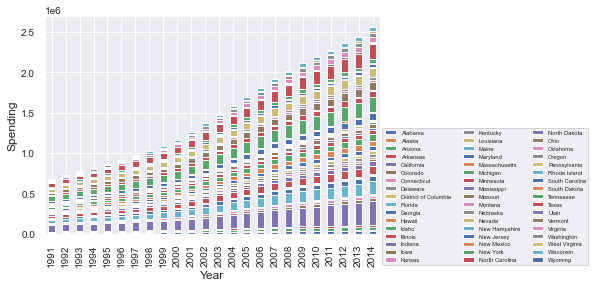

In [130]:
##Q4
df4 = pd.read_csv('https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/KFF/healthcare-spending.csv', skiprows = 2)
index_skipped = [0]
index_skipped.extend(list(range(52,64)))
df4 = df4.drop(index_skipped)
head = ['Location']
head.extend([str(year) for year in range(1991,2015)])
df4.columns = head
df4_long = pd.melt(df4, id_vars='Location', value_vars = df4.columns[1::], var_name = 'Year', value_name = 'Spending')
df4_pivot = df4_long.pivot(index='Year', columns='Location', values='Spending')
df4_pivot.plot(kind = 'bar', stacked = True,legend = False)
plt.xlabel('Year')
plt.ylabel('Spending')
plt.legend(loc = 'best', fontsize = 'xx-small', ncol = 3,bbox_to_anchor=(1.0,0.5))
plt.show()

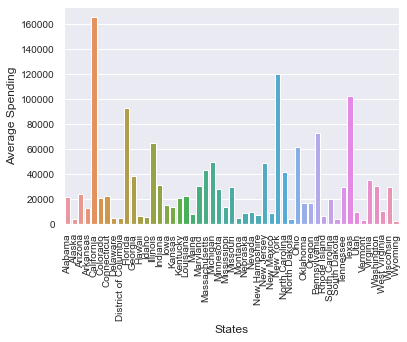

In [131]:
##Q6
df5 = df4_long.groupby('Location')['Spending'].mean().reset_index(name = 'Average Spending')
plot5 = sns.barplot(x = 'Location', y = 'Average Spending', data = df5)
plt.xticks(rotation = 90)
plt.xlabel('States')
plt.ylabel('Average Spending')
plt.rc('xtick', labelsize = 5)
plt.rc('ytick', labelsize = 6)
plt.show()